In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

### Используем готовый набор данных heart_disease из UC Irvine Machine Learning Repo

In [101]:
heart_disease = fetch_ucirepo(id=45)

In [102]:
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [103]:
df = pd.DataFrame(X)
df['target'] = y

In [104]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


### описание признаков

In [105]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [106]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Сформулируем задачу

In [124]:
#Наша цель состоит в том,чтобы предсказать,страдает ли человек сердечными заболеванияит на основе их хпрактеристик,то есть использовать переменную target
# в качестве целевой переменной и применять другие характеристики для прогнозирования.

### Произведём чистку данных (Data Cleaning)

In [107]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [125]:
#Для проверки наличия хотя бы одного True в строке
nan_rows = df[df.isna().any(axis=1)]

In [109]:
nan_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [126]:
#Поскольку количество пропущенных значений не велико,используем медиану для их заполнения
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())

In [111]:
print("Number of missing values in 'ca':", df['ca'].isnull().sum())
print("Number of missing values in 'thal':", df['thal'].isnull().sum())

Number of missing values in 'ca': 0
Number of missing values in 'thal': 0


### Проведём анализ признаков

In [127]:
#Поле"target" относится к наличию сердечно-сосудистых заболеваний у пациента.Оно имеет целочисленное значение от 0(отсутствие)-4 

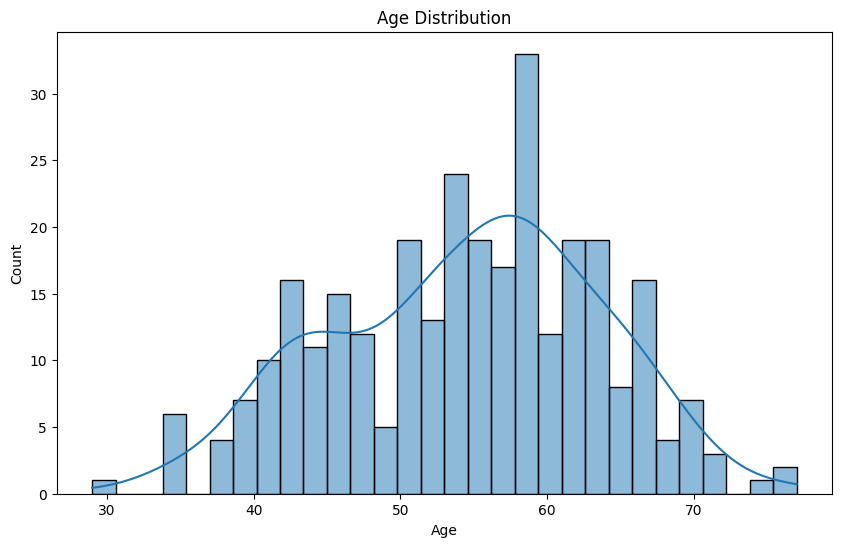

In [70]:
plt.figure(figsize=(10, 6))  
sns.histplot(df['age'], bins=30, kde=True)  
plt.title('Age Distribution')  
plt.xlabel('Age')  
plt.ylabel('Count')  
plt.show()

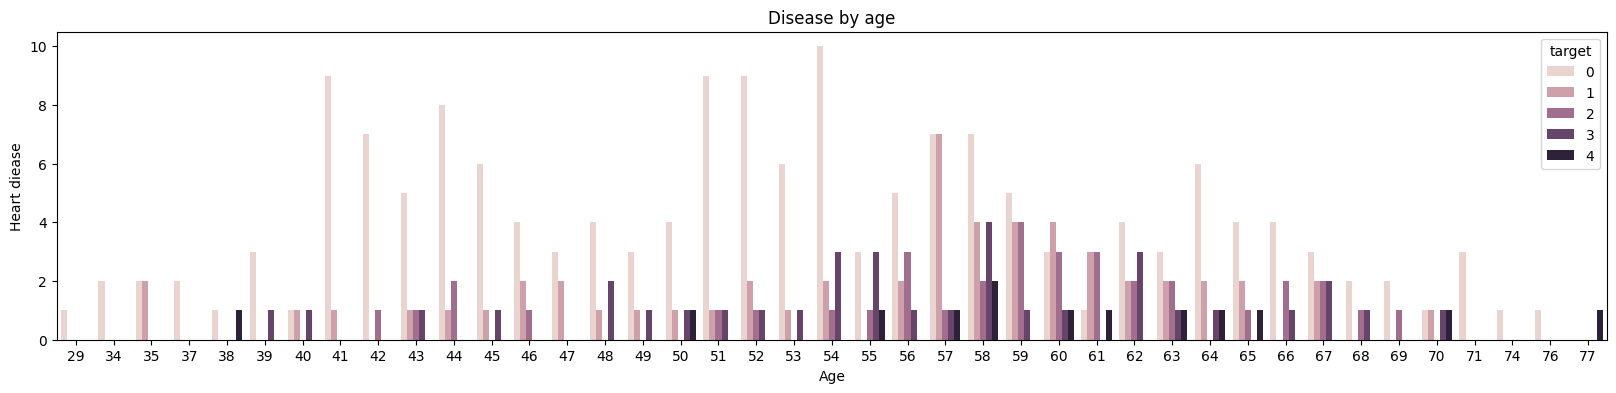

In [122]:
#возраст и связь с сердечными заболеваниями
#Вывод: с увеличением возраста вероятность развития сердечных заболеваний возрастает,достигая максимума в 59 лет,
#после чего с дальнейшим увеличением возраста вероятность заболевания снижается
plt.figure(figsize=(20,4))
sns.countplot(x='age',hue='target',data=df)
plt.title('Disease by age')
plt.xlabel('Age')
plt.ylabel('Heart diease')
plt.show()

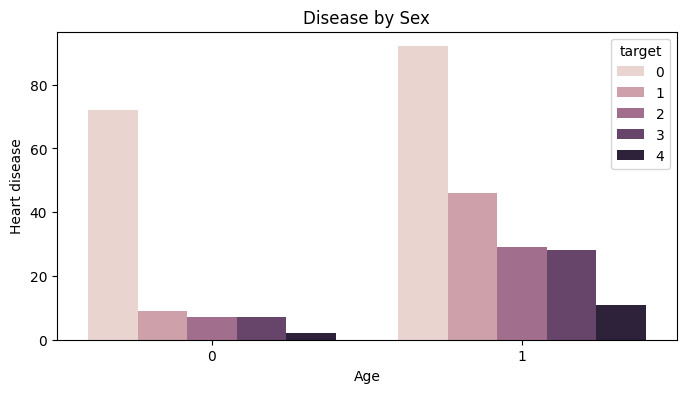

In [123]:
# 1:male 0:female
# Связь между полом и заболеванием сердца
# Вывод: вероятность заболевания сердца у мужчин выше, чем у женщин.
plt.figure(figsize=(8, 4))  
sns.countplot(x='sex', hue='target', data=df)  
plt.title('Disease by Sex')  
plt.xlabel('Age')  
plt.ylabel('Heart disease')  
plt.show()

### Оценим зависимость между признаками

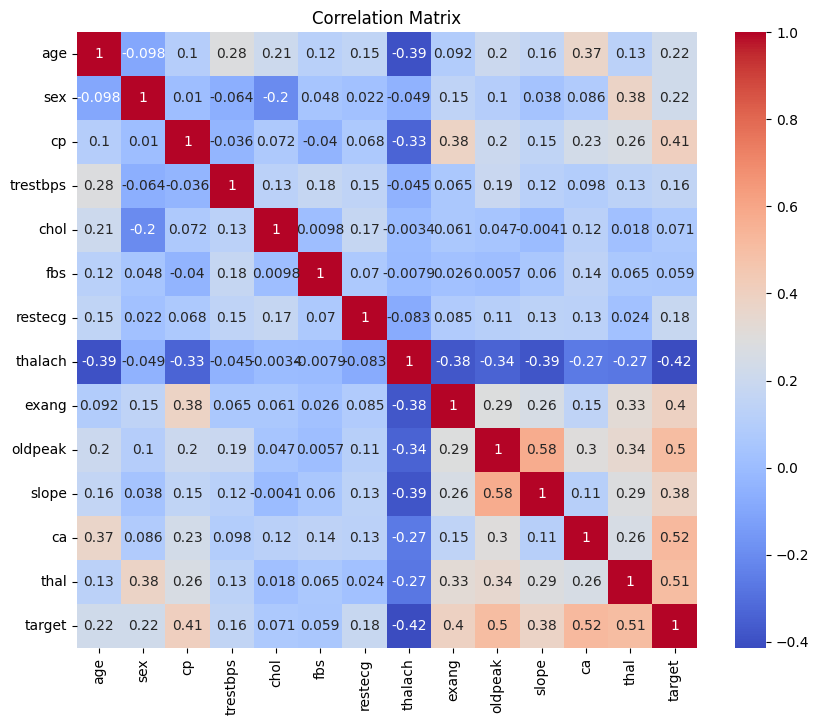

In [79]:
# вычисяем матрицы корреляции
corr_matrix = df.corr()  

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix')  
plt.show()

### Feature Engineering

In [128]:
# Согласно характиристиками набора данных,мы обнаружили,что целевое значение преставлено 5 числами от 0-4,где 0 означает 
# отсутствие сердечно заболеваний,а 1-4 обзначают степени сердечно заболеваний.здесь мы хотим лишь узнать,есть ли у пациента сердечно заболевания
# поэтому мы преобразуем значения целевой переменной в 0 и 1.

In [88]:
target_new= df['target'].apply(lambda x: 1 if x != 0 else 0)

In [91]:
df_new = df 
df_new['target'] = target_new

In [92]:
df_new 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [129]:
# Согласно построенной корреляционной матрицы можно наблюдать,что такие характиристики,как chol,fbs,thalach,имеют незначительное 
# отношениек прогнозу,поэтому их можно удалить 

In [95]:
df_new = df_new.drop(['chol','fbs','thalach'],axis=1)

In [96]:
df_new.head()

,age,sex,cp,trestbps,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,2,0,2.3,3,0.0,6.0,0
1,67,1,4,160,2,1,1.5,2,3.0,3.0,1
2,67,1,4,120,2,1,2.6,2,2.0,7.0,1
3,37,1,3,130,0,0,3.5,3,0.0,3.0,0
4,41,0,2,130,2,0,1.4,1,0.0,3.0,0


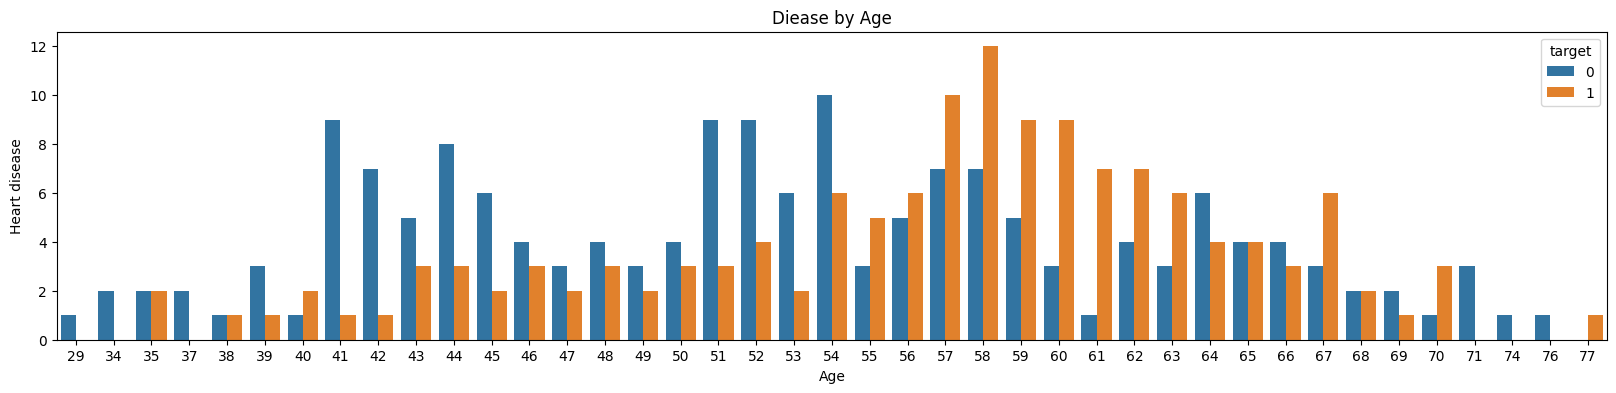

In [130]:
#возраст и связь с сердечными заболеваниями
#0:Не болен 1: заболел
plt.figure(figsize=(20, 4))  
sns.countplot(x='age', hue='target', data=df_new)  
plt.title('Diease by Age')  
plt.xlabel('Age')  
plt.ylabel('Heart disease')  
plt.show()